# Importing the libraries and loading the data set


In [1]:
# Importing Libraries required.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [2]:
# Loading the data from the file.
data = pd.read_csv('mh.csv')

In [3]:
# Changing columns to a better format.
data.columns = [
    'is_self_employed',
    'number_of_employees',
    'is_tech_company',
    'is_role_tech_related',
    'provides_mental_health_benefits',
    'aware_of_mental_health_options',
    'employer_discusses_mental_health',
    'employer_resources_for_mental_health',
    'anonymity_protected_for_treatment',
    'request_medical_leave_due_to_mental_health',
    'fear_negative_consequences_discussing_mental_health',
    'fear_negative_consequences_discussing_physical_health',
    'comfortable_discussing_mental_health_with_coworkers',
    'comfortable_discussing_mental_health_with_supervisors',
    'employer_takes_mental_health_seriously',
    'observed_negative_consequences_for_open_discussions',
    'has_medical_coverage_for_mental_health',
    'aware_of_local_or_online_mental_health_resources',
    'disclosed_mental_health_issue_to_clients',
    'disclosure_impact_on_relationships_with_clients',
    'disclosed_mental_health_issue_to_coworkers',
    'disclosure_impact_on_relationships_with_coworkers',
    'productivity_impacted_by_mental_health',
    'percentage_of_work_time_impacted_by_mental_health',
    'has_previous_employers',
    'previous_employers_provided_mental_health_benefits',
    'aware_of_mental_health_options_with_previous_employers',
    'previous_employers_discussed_mental_health',
    'previous_employers_resources_for_mental_health',
    'anonymity_protected_for_previous_employers',
    'fear_negative_consequences_discussing_mental_health_previous',
    'fear_negative_consequences_discussing_physical_health_previous',
    'willing_to_discuss_mental_health_with_previous_coworkers',
    'willing_to_discuss_mental_health_with_previous_supervisors',
    'previous_employers_took_mental_health_seriously',
    'observed_negative_consequences_for_coworkers_previous',
    'willing_to_discuss_physical_health_in_interview',
    'reason_for_willingness_to_discuss_physical_health',
    'willing_to_discuss_mental_health_in_interview',
    'reason_for_willingness_to_discuss_mental_health',
    'fear_career_impact_from_mental_health_disclosure',
    'fear_negative_view_from_coworkers_due_to_mental_health',
    'willing_to_share_mental_health_with_friends_family',
    'observed_unsupportive_response_to_mental_health_issues',
    'impact_of_observing_others_on_disclosure_of_mental_health',
    'family_history_of_mental_illness',
    'history_of_mental_health_disorder',
    'current_mental_health_disorder',
    'diagnosed_conditions',
    'suspected_conditions',
    'diagnosed_by_professional',
    'diagnosed_conditions_by_professional',
    'sought_treatment_for_mental_health',
    'treatment_interference_with_work_when_effectively_treated',
    'treatment_interference_with_work_when_not_effectively_treated',
    'age',
    'gender',
    'country_of_residence',
    'us_state_or_territory_of_residence',
    'country_of_work',
    'us_state_or_territory_of_work',
    'work_position',
    'works_remotely'
]

# Familiarizing with the data

In [4]:
# Visualising the number of rows and columns 
print(data.shape)

(1433, 63)


In [5]:
# Visualising a summary of data using describe
data.describe()
#print(data.describe())

is_self_employed  is_tech_company  is_role_tech_related  \
count       1433.000000      1146.000000            263.000000   
mean           0.200279         0.770506              0.942966   
std            0.400349         0.420691              0.232350   
min            0.000000         0.000000              0.000000   
25%            0.000000         1.000000              1.000000   
50%            0.000000         1.000000              1.000000   
75%            0.000000         1.000000              1.000000   
max            1.000000         1.000000              1.000000   

       has_medical_coverage_for_mental_health  has_previous_employers  \
count                              287.000000             1433.000000   
mean                                 0.644599                0.882066   
std                                  0.479471                0.322643   
min                                  0.000000                0.000000   
25%                                  0.000000                1.000000   
50%                                  1.000000                1.000000   
75%                                  1.000000                1.000000   
max                                  1.000000                1.000000   

       sought_treatment_for_mental_health          age  
count                         1433.000000  1433.000000  
mean                             0.585485    34.286113  
std                              0.492810    11.290931  
min                              0.000000     3.000000  
25%                              0.000000    28.000000  
50%                              1.000000    33.000000  
75%                              1.000000    39.000000  
max                              1.000000   323.000000

In [6]:
# Visualising the Label of every column
print(list(data.columns))

['is_self_employed', 'number_of_employees', 'is_tech_company', 'is_role_tech_related', 'provides_mental_health_benefits', 'aware_of_mental_health_options', 'employer_discusses_mental_health', 'employer_resources_for_mental_health', 'anonymity_protected_for_treatment', 'request_medical_leave_due_to_mental_health', 'fear_negative_consequences_discussing_mental_health', 'fear_negative_consequences_discussing_physical_health', 'comfortable_discussing_mental_health_with_coworkers', 'comfortable_discussing_mental_health_with_supervisors', 'employer_takes_mental_health_seriously', 'observed_negative_consequences_for_open_discussions', 'has_medical_coverage_for_mental_health', 'aware_of_local_or_online_mental_health_resources', 'disclosed_mental_health_issue_to_clients', 'disclosure_impact_on_relationships_with_clients', 'disclosed_mental_health_issue_to_coworkers', 'disclosure_impact_on_relationships_with_coworkers', 'productivity_impacted_by_mental_health', 'percentage_of_work_time_impacted_

In [7]:
# Visualising Value counts of every column
for col in data.columns:
    print(data[col].value_counts())
    print("-----------------------------------")

is_self_employed
0    1146
1     287
Name: count, dtype: int64
-----------------------------------
number_of_employees
26-100            292
More than 1000    256
100-500           248
6-25              210
500-1000           80
1-5                60
Name: count, dtype: int64
-----------------------------------
is_tech_company
1.0    883
0.0    263
Name: count, dtype: int64
-----------------------------------
is_role_tech_related
1.0    248
0.0     15
Name: count, dtype: int64
-----------------------------------
provides_mental_health_benefits
Yes                                531
I don't know                       319
No                                 213
Not eligible for coverage / N/A     83
Name: count, dtype: int64
-----------------------------------
aware_of_mental_health_options
No               354
I am not sure    352
Yes              307
Name: count, dtype: int64
-----------------------------------
employer_discusses_mental_health
No              813
Yes             230
I d

In [8]:
# Visulaising the numebr off missing values in every column
print(data.isnull().sum())

is_self_employed                         0
number_of_employees                    287
is_tech_company                        287
is_role_tech_related                  1170
provides_mental_health_benefits        287
                                      ... 
us_state_or_territory_of_residence     593
country_of_work                          0
us_state_or_territory_of_work          582
work_position                            0
works_remotely                           0
Length: 63, dtype: int64


In [9]:
# Visualising the columns that are not string
try:
    print(data.describe(include='float'))
    print(data.describe(include='int'))
    print(data.describe(include='bool'))
except Exception as e:
    print(e)

       is_tech_company  is_role_tech_related  \
count      1146.000000            263.000000   
mean          0.770506              0.942966   
std           0.420691              0.232350   
min           0.000000              0.000000   
25%           1.000000              1.000000   
50%           1.000000              1.000000   
75%           1.000000              1.000000   
max           1.000000              1.000000   

       has_medical_coverage_for_mental_health  
count                              287.000000  
mean                                 0.644599  
std                                  0.479471  
min                                  0.000000  
25%                                  0.000000  
50%                                  1.000000  
75%                                  1.000000  
max                                  1.000000  
       is_self_employed  has_previous_employers  \
count       1433.000000             1433.000000   
mean           0.200279          

<Axes: >

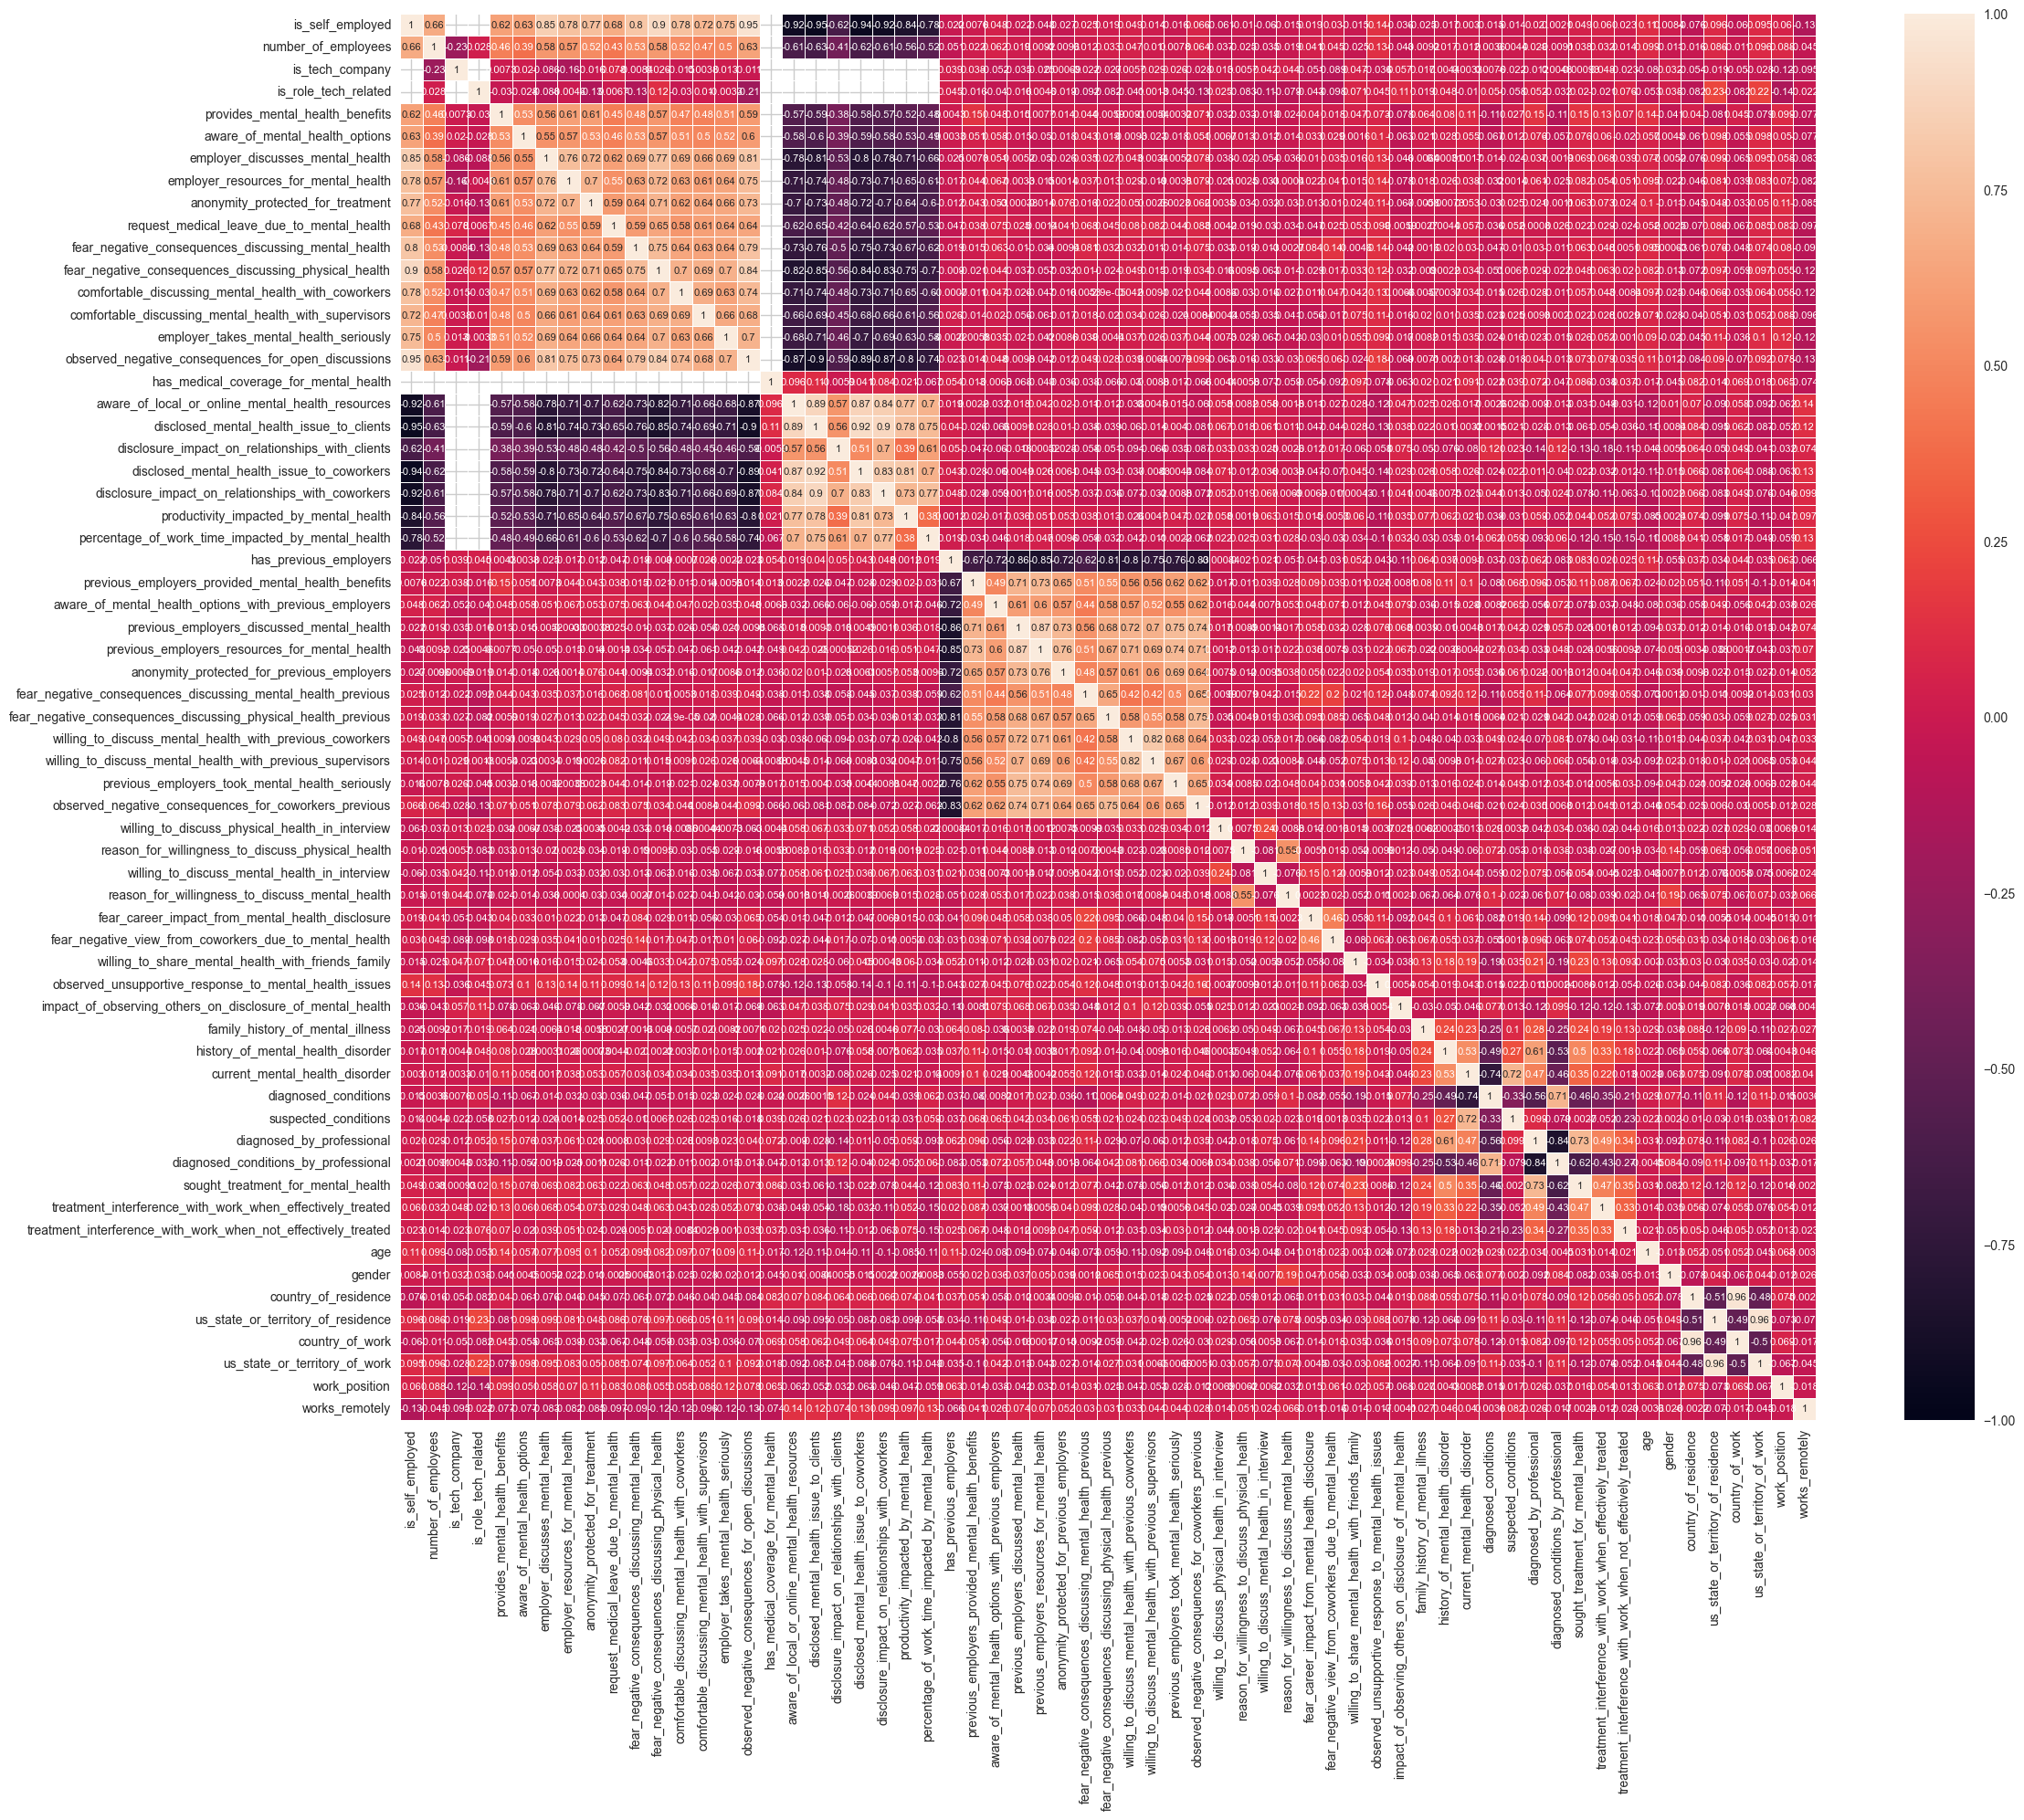

In [10]:
# Ploting the correlation heatmap
label = LabelEncoder()

data_copy = data.copy()
for column in data_copy.columns:
    if data_copy[column].dtype == 'object':
        data_copy[column] = label.fit_transform(data_copy[column].astype(str))

plt.figure(figsize=(25, 20))

sns.heatmap(data_copy.corr(), vmin=-1, vmax=1, annot=True, annot_kws={'size': 8}, linewidths=0.7)

# Preproccessing the data

In [11]:
# Droping columns due to duplicate and defined in other columns or not enough  
print("Before:\n",data.shape)

columns_to_drop = [
    "country_of_work",
    "sought_treatment_for_mental_health",
    "history_of_mental_health_disorder",
    "fear_career_impact_from_mental_health_disclosure",
    "previous_employers_resources_for_mental_health",
    "observed_negative_consequences_for_coworkers_previous",
    "reason_for_willingness_to_discuss_mental_health",
    "reason_for_willingness_to_discuss_physical_health"
    ]
data.drop(columns_to_drop, axis=1, inplace=True)

print("\nAfter:\n",data.shape)

Before:
 (1433, 63)

After:
 (1433, 55)


In [12]:
# Removing uncertain answers and columns that are missing more than 30%, 29%, 24%, 22%, 21% or 20% of the values.
print("Before:\n",data.shape)

data = data.replace("Not applicable to me",np.nan)

percentage_missing = data.isnull().sum() * 100 / len(data)
col_to_drop = percentage_missing[percentage_missing > 30].keys()
data.drop(col_to_drop, axis=1, inplace=True)

print("\nAfter:\n",data.shape)

Before:
 (1433, 55)

After:
 (1433, 38)


In [13]:
# Cleaning ['age']. Transforming values to 4 categories.
print("Before:\n",data["age"].value_counts())

data['age'] = pd.cut(data['age'], bins=[18, 30, 40, 50, 60], 
                     labels=['18-30', '30-40', '40-50', '50+'], 
                     right=False).fillna('50+')

print("\nAfter:\n",data["age"].value_counts())

Before:
 age
30     94
31     82
29     79
28     74
35     74
32     72
33     69
34     69
26     64
27     63
37     59
39     55
38     54
36     50
25     44
24     42
40     36
22     32
44     31
43     30
42     29
45     27
23     24
41     24
46     22
21     15
47     14
49     13
55     12
50      9
48      9
54      7
52      7
51      7
20      6
56      5
63      4
57      4
19      4
53      3
61      2
59      2
66      1
74      1
65      1
15      1
17      1
3       1
58      1
62      1
323     1
99      1
70      1
Name: count, dtype: int64

After:
 age
30-40    678
18-30    447
40-50    235
50+       73
Name: count, dtype: int64


In [14]:
# Cleaning ['gender']. Transforming values to 3 categories.
print("Before:\n",data["gender"].value_counts())

data["gender"] = data["gender"].str.lower()
data["gender"] = data["gender"].str.strip()

man = ["male","m","malr","sex is male","mail" , "dude","m|",
        "i'm a man why didn't you make this a drop down question. you should of asked sex? and i would of answered yes please. seriously how much text can this take?",
        "male.", "man"]
woman = ["f","woman", "female", "fm", " female", "female/woman",
         "female (props for making this a freeform field, though)",
         "fem", "female ", "i identify as female."]

data["gender"] = data["gender"].replace(man, "man")
data["gender"] = data["gender"].replace(woman, "woman")
data["gender"] = data["gender"].apply(lambda x: "diverse" if x not in ["man", "woman"] else x)

print("\nAfter:\n",data["gender"].value_counts())

Before:
 gender
Male           610
male           249
Female         153
female          95
M               86
              ... 
cis male         1
Human            1
Genderfluid      1
Enby             1
MALE             1
Name: count, Length: 70, dtype: int64

After:
 gender
man        1050
woman       334
diverse      49
Name: count, dtype: int64


In [15]:
# Cleaning ['work_position']. Transforming values to 3 categories.
print("Before:\n",data["work_position"].value_counts())

category_map = {
    "Management":["supervisor", "team lead", "leadership", "executive"],
    "Development":["back", "developer", "front", "devops", "sysadmin", "dev"],
}

def categorize_role(role):
    role = role.lower()
    for key, values in category_map.items():
        if any(value in role for value in values):
            return key
    return "Other"

data['work_position'] = data['work_position'].apply(categorize_role)

print("\nAfter:\n",data["work_position"].value_counts())

Before:
 work_position
Back-end Developer                                                                                              263
Front-end Developer                                                                                             125
Other                                                                                                           112
Supervisor/Team Lead                                                                                             68
Back-end Developer|Front-end Developer                                                                           61
                                                                                                               ... 
Front-end Developer|Back-end Developer|Support|Dev Evangelist/Advocate                                            1
Front-end Developer|Back-end Developer|Support|DevOps/SysAdmin|Dev Evangelist/Advocate                            1
Other|Dev Evangelist/Advocate|DevOps/SysAdmin|Sup

In [16]:
# Cleaning ['country_of_residence']. Reducing the number of countries and re labeling them as other if they are less than 3% of entire data.
print("Before:\n",data["country_of_residence"].value_counts())

value_counts = data['country_of_residence'].value_counts()
threshold = round(data.shape[0] * 0.04)
countries_to_keep = value_counts[value_counts >= threshold].index.tolist()
data['country_of_residence'] = data['country_of_residence'].apply(lambda x: x if x in countries_to_keep else "other")

print("\nAfter:\n",data["country_of_residence"].value_counts())

Before:
 country_of_residence
United States of America    840
United Kingdom              180
Canada                       78
Germany                      58
Netherlands                  48
Australia                    35
Sweden                       19
France                       16
Ireland                      15
Switzerland                  10
Brazil                       10
New Zealand                   9
India                         9
Russia                        9
Bulgaria                      7
Finland                       7
Denmark                       7
Italy                         5
Belgium                       5
South Africa                  4
Romania                       4
Spain                         4
Poland                        4
Austria                       4
Norway                        3
Pakistan                      3
Chile                         3
Czech Republic                3
Japan                         2
Israel                        2
Other     

In [17]:
# Cleaning and maping valeus of multiple columns to reduce the categories or value counts and for better readability.
print("Before:\n",data.describe())

replacements = {
    'country_of_residence': {
        "United States of America": "USA", 
        "United Kingdom": "UK"
    },
    'aware_of_mental_health_options_with_previous_employers': {
        'I was aware of some': 'Yes',
        'Yes, I was aware of all of them': 'Yes',
        'N/A (not currently aware)': 'No',
        'No, I only became aware later': 'No'
    },
    'previous_employers_discussed_mental_health': {
        'Some did': 'Yes',
        'Yes, they all did': 'Yes',
        'None did': 'No',
        'I don\'t know': 'No'
    },
    'family_history_of_mental_illness': {
        'I don\'t know': 'Maybe'
    },
    'willing_to_share_mental_health_with_friends_family': {
        'Very open': 'Yes',
        'Somewhat open': 'Yes',
        'Somewhat not open': 'No',
        'Not open at all': 'No',
        'Neutral': 'Maybe',
        'Not applicable to me (I do not have a mental illness)': 'Maybe'
    },
    'willing_to_discuss_mental_health_with_previous_supervisors': {
        'Yes, at all of my previous employers': 'Yes',
        'Some of my previous employers': 'Yes',
        'No, at none of my previous employers': 'No',
        'I don\'t know': 'Maybe'
    },
    'willing_to_discuss_mental_health_with_previous_coworkers': {
        'Yes, at all of my previous employers': 'Yes',
        'No, at none of my previous employers': 'No',
        'Some of my previous employers': 'Maybe'
    },
    "fear_negative_consequences_discussing_physical_health": {
        "Yes": "Yes",
        "No": "No",
        "Maybe": "Yes"
    },
    'is_self_employed': {1: 'Yes', 0: 'No'},
    'has_previous_employers': {1: 'Yes', 0: 'No'},
}

for column, mapping in replacements.items():
    data[column] = data[column].replace(mapping)

print("\nAfter:\n",data.describe())

Before:
        is_self_employed  is_tech_company  has_previous_employers
count       1433.000000      1146.000000             1433.000000
mean           0.200279         0.770506                0.882066
std            0.400349         0.420691                0.322643
min            0.000000         0.000000                0.000000
25%            0.000000         1.000000                1.000000
50%            0.000000         1.000000                1.000000
75%            0.000000         1.000000                1.000000
max            1.000000         1.000000                1.000000

After:
        is_tech_company
count      1146.000000
mean          0.770506
std           0.420691
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000


In [18]:
# Cleaning multiple columns with the values that are supposed to represent Yes, No, and Maybe. 
print("Before:\n",data.describe())

def simplify_view_and_impact(value):
    value = value.lower()
    if "yes" in value:
        return "Yes"
    elif "no" in value:
        return "No"
    else:
        return "Maybe"

data['fear_negative_view_from_coworkers_due_to_mental_health'] = data['fear_negative_view_from_coworkers_due_to_mental_health'].apply(simplify_view_and_impact)

print("\nAfter:\n",data.describe())

Before:
        is_tech_company
count      1146.000000
mean          0.770506
std           0.420691
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000

After:
        is_tech_company
count      1146.000000
mean          0.770506
std           0.420691
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000


In [19]:
# Cleaning the data from missing values, while replacing them with the most frequent value.
print("Before:\n",data.describe())

data = data.replace("I don't know",np.nan)

mode_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
mode_imputer.fit(data)
imputed_data = mode_imputer.transform(data)
data = pd.DataFrame(data=imputed_data, columns=data.columns)

print("\nAfter:\n",data.describe())

Before:
        is_tech_company
count      1146.000000
mean          0.770506
std           0.420691
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000

After:
        is_self_employed number_of_employees  is_tech_company  \
count              1433                1433           1433.0   
unique                2                   6              2.0   
top                  No              26-100              1.0   
freq               1146                 579           1170.0   

       provides_mental_health_benefits aware_of_mental_health_options  \
count                             1433                           1433   
unique                               3                              3   
top                                Yes                             No   
freq                              1137                            774   

       employer_discusses_mental_health employer_resources_for_mental_health  \
count   

In [20]:
# Save the data as a CSV file called "Altered_MH.csv"
data.to_csv('Altered_MH.csv', index=False)

# Graphs and Plots

<Axes: >

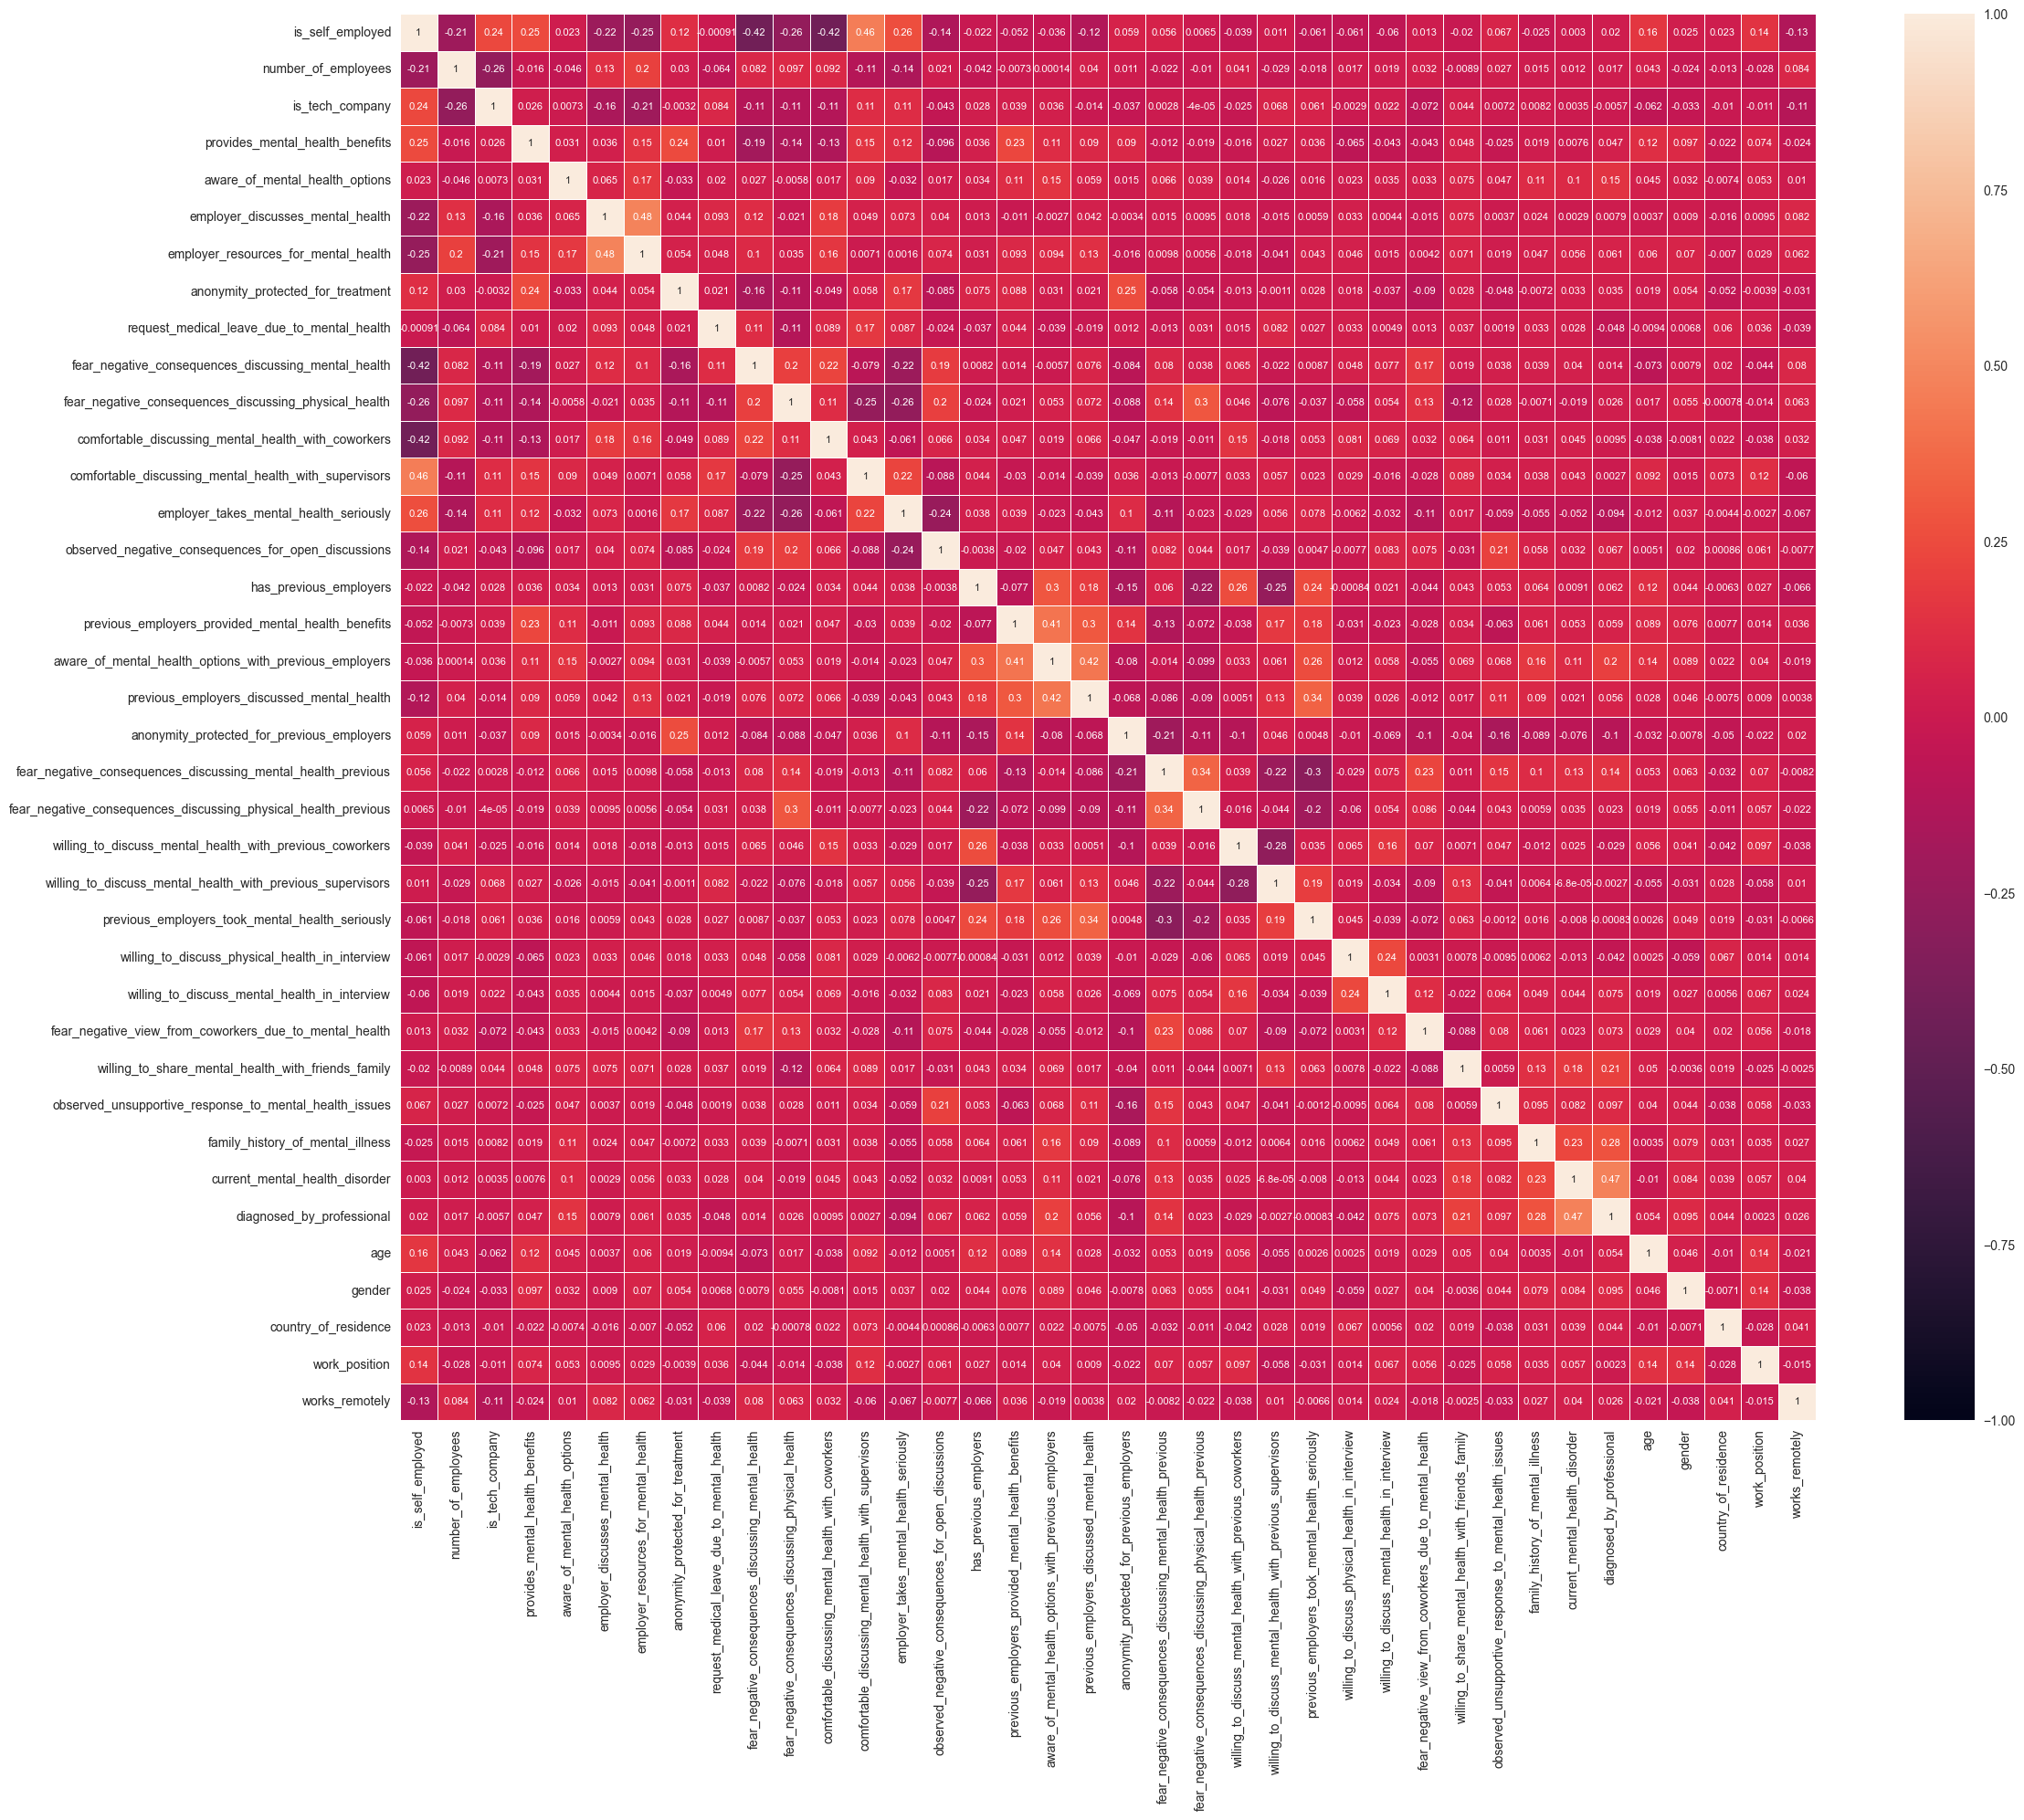

In [21]:
# Ploting the correlation heatmap.
label = LabelEncoder()

data_copy = data.copy()
for column in data_copy.columns:
    if data_copy[column].dtype == 'object':
        data_copy[column] = label.fit_transform(data_copy[column].astype(str))

plt.figure(figsize=(25, 20))

sns.heatmap(data_copy.corr(), vmin=-1, vmax=1, annot=True, annot_kws={'size': 8}, linewidths=0.7)

C:\Users\mohse\AppData\Local\Temp\ipykernel_18200\899463219.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette="viridis")


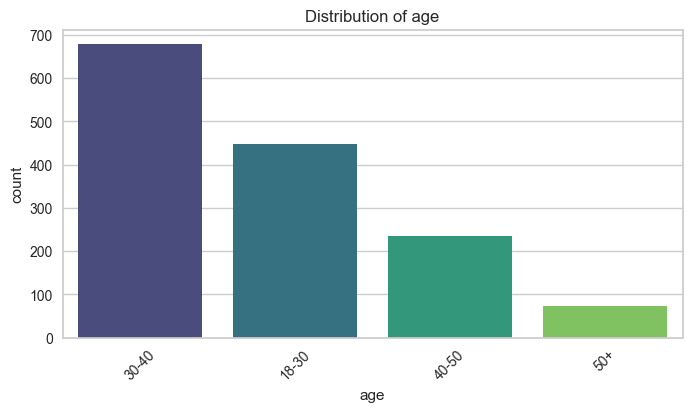

C:\Users\mohse\AppData\Local\Temp\ipykernel_18200\899463219.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette="viridis")


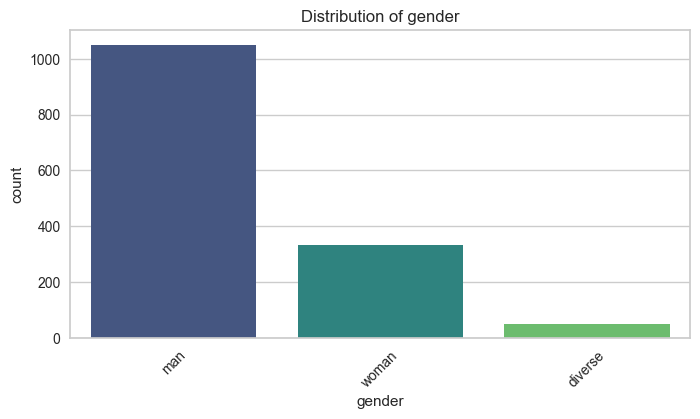

C:\Users\mohse\AppData\Local\Temp\ipykernel_18200\899463219.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette="viridis")


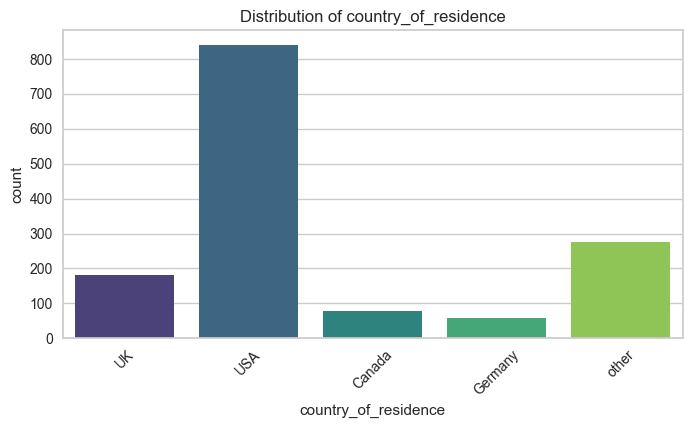

C:\Users\mohse\AppData\Local\Temp\ipykernel_18200\899463219.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette="viridis")


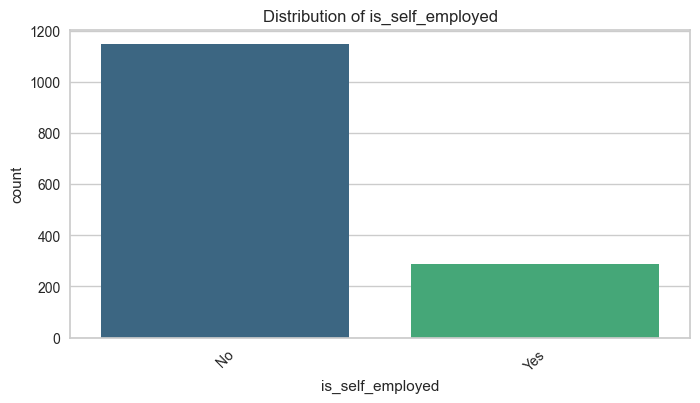

C:\Users\mohse\AppData\Local\Temp\ipykernel_18200\899463219.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette="viridis")


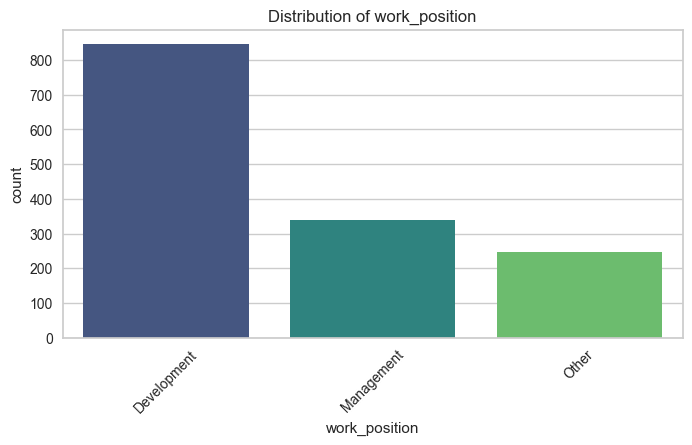

C:\Users\mohse\AppData\Local\Temp\ipykernel_18200\899463219.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette="viridis")


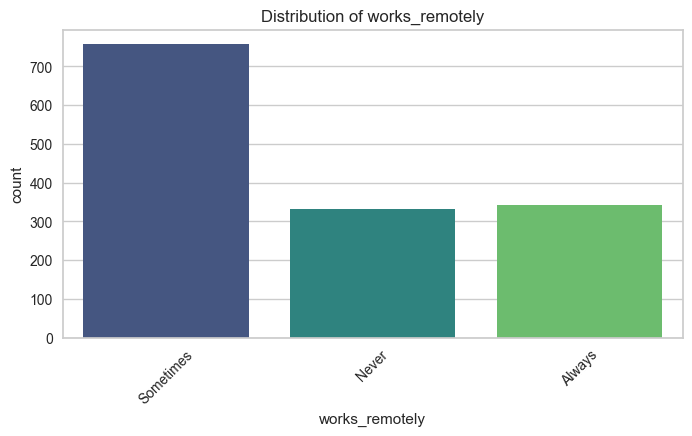

In [22]:
# Ploting Bar Charts for selected columns.
Columns = [
    'age',
    'gender',
    'country_of_residence', 
    'is_self_employed',       
    'work_position', 
    'works_remotely',
    ]

for col in Columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=data, x=col, palette="viridis")
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

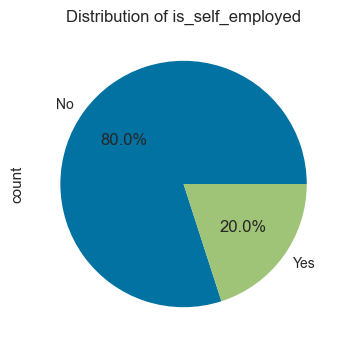

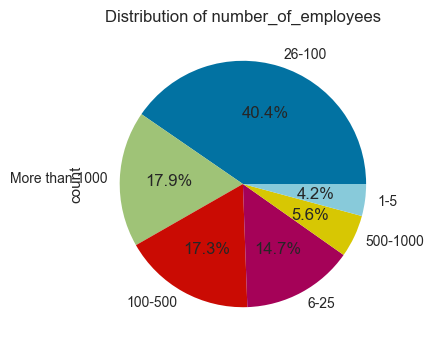

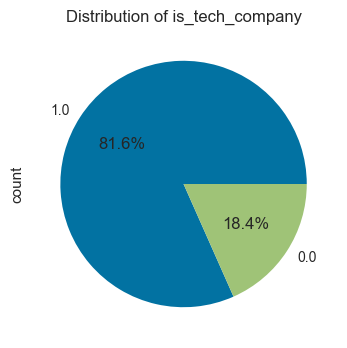

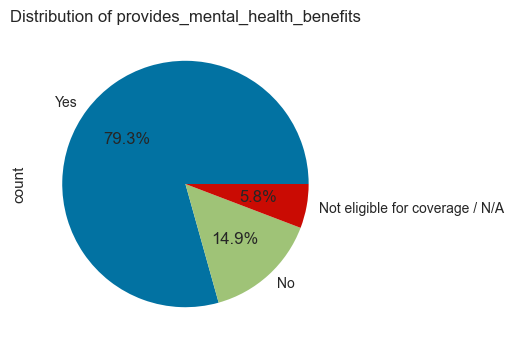

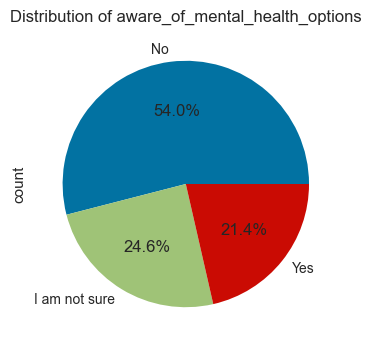

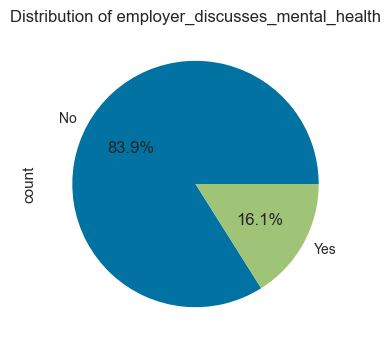

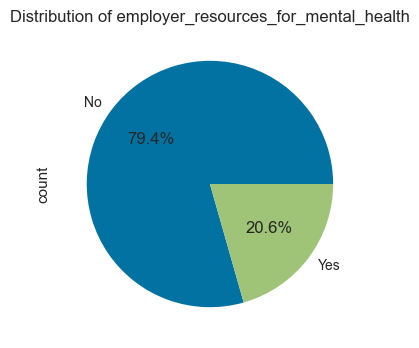

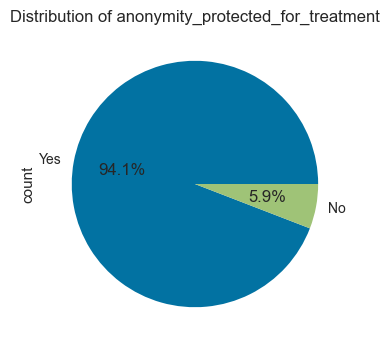

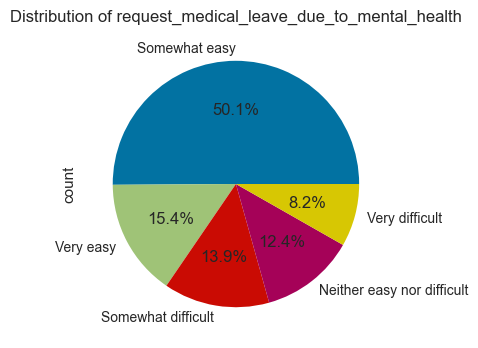

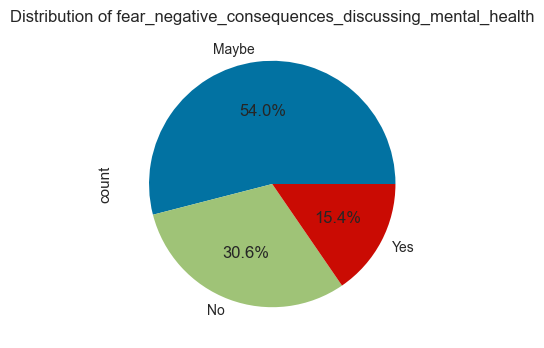

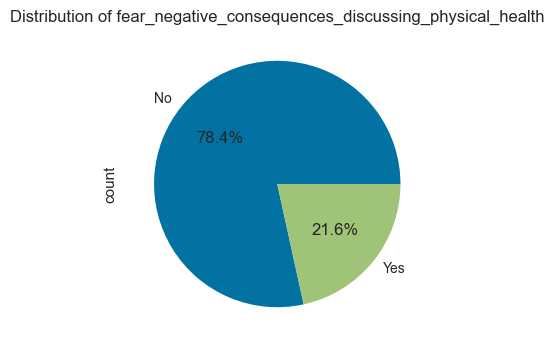

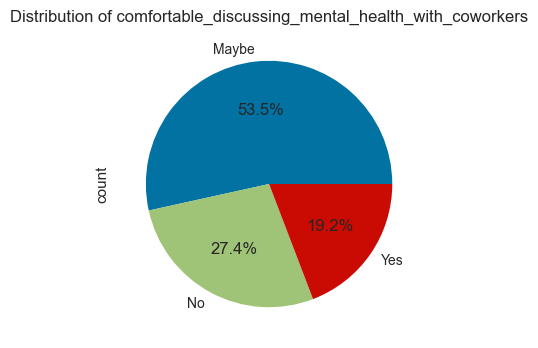

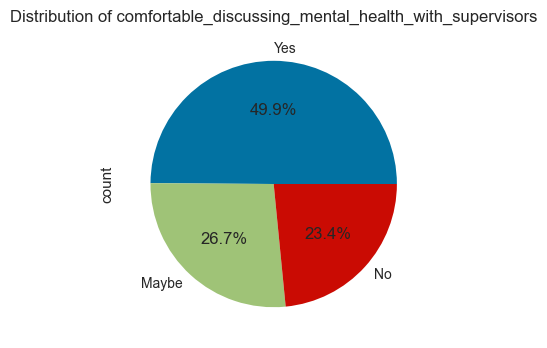

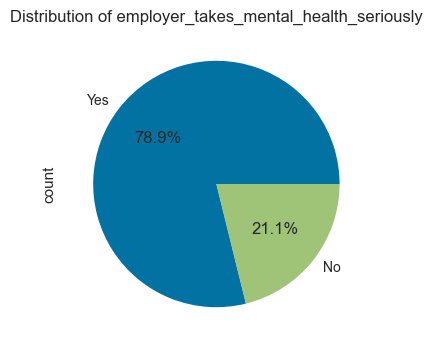

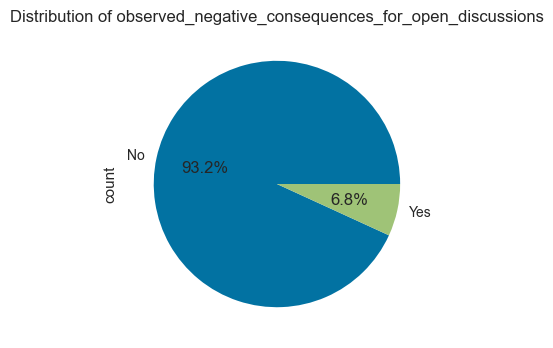

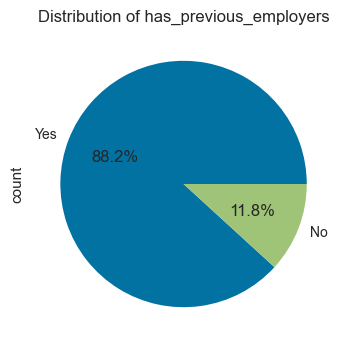

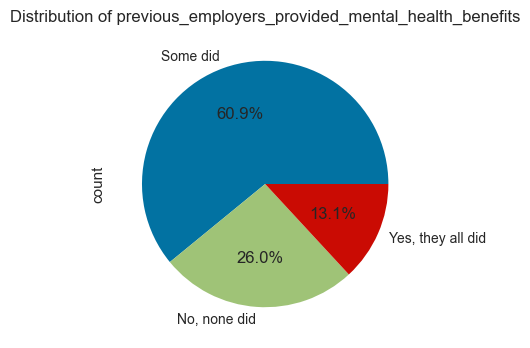

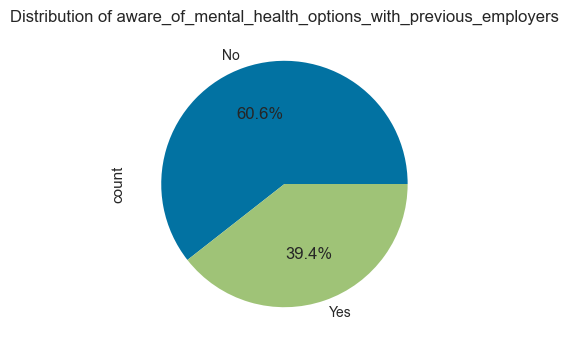

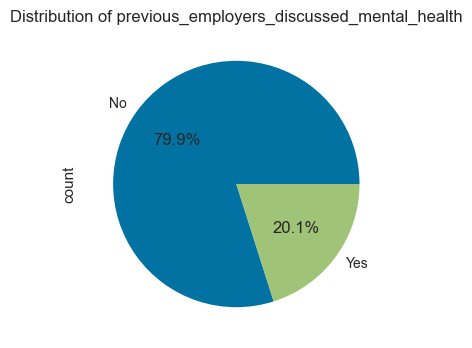

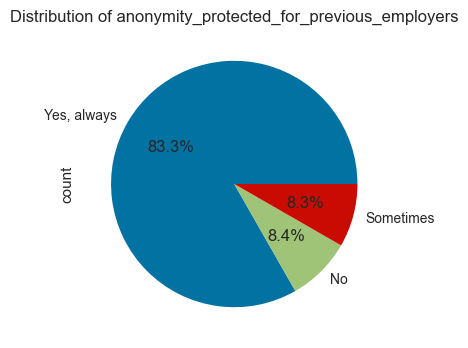

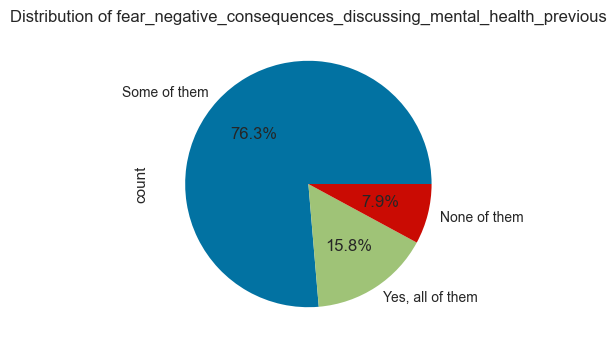

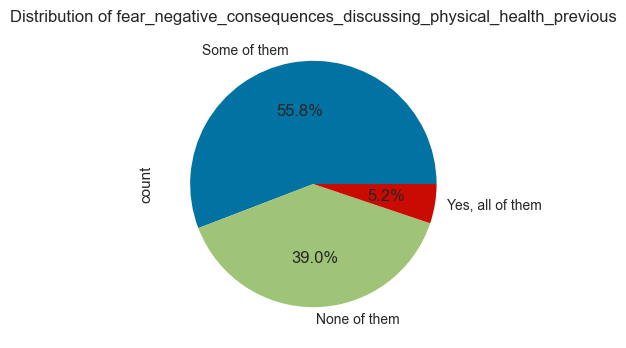

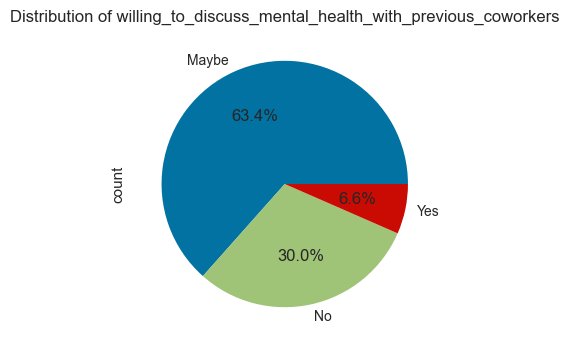

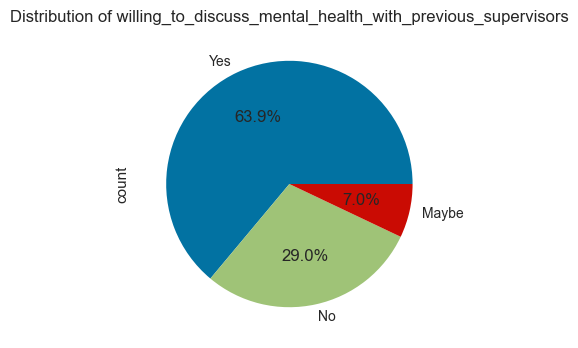

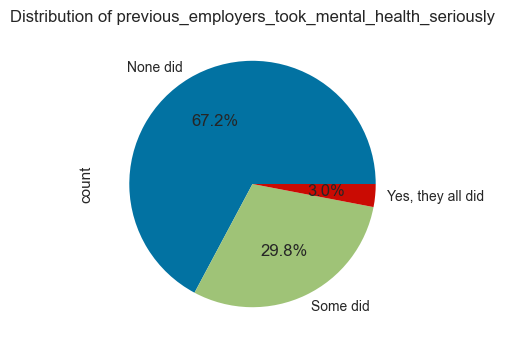

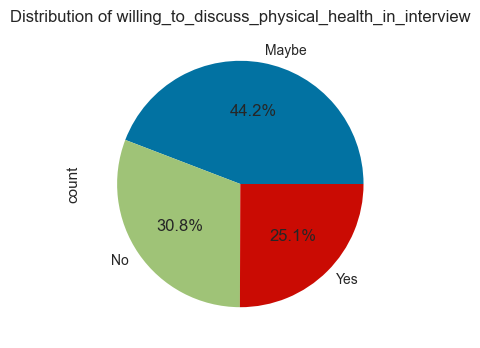

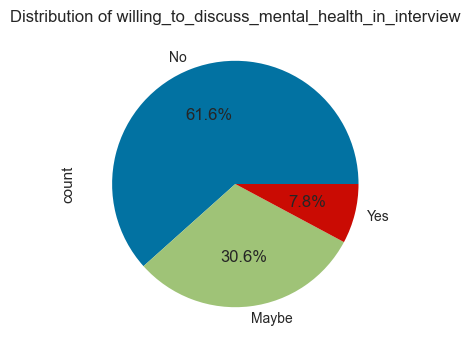

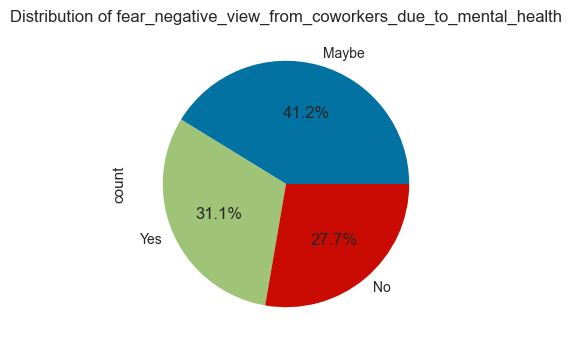

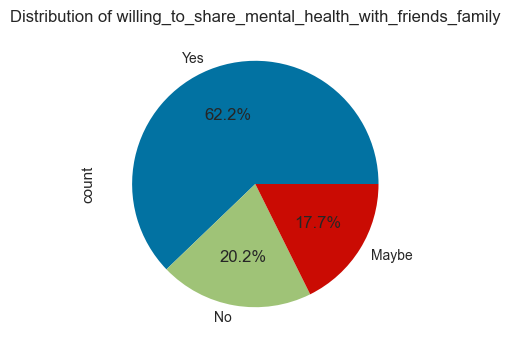

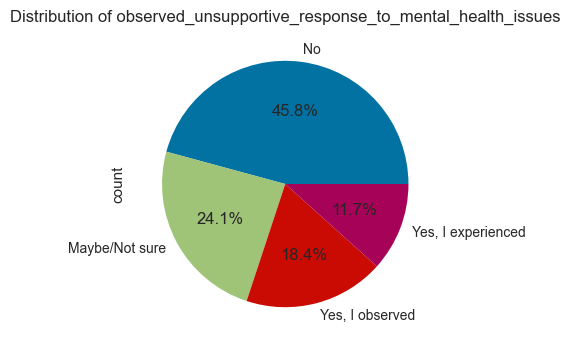

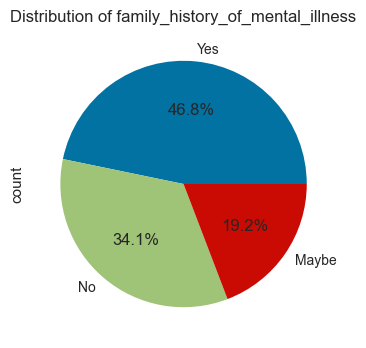

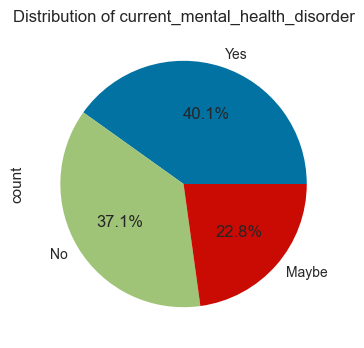

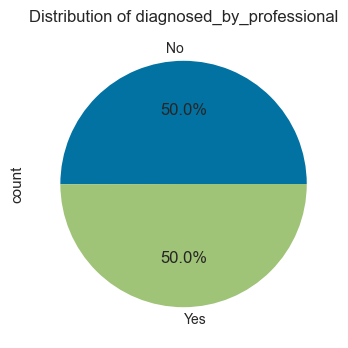

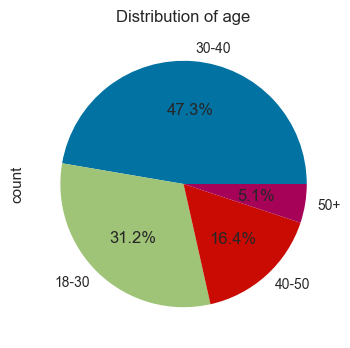

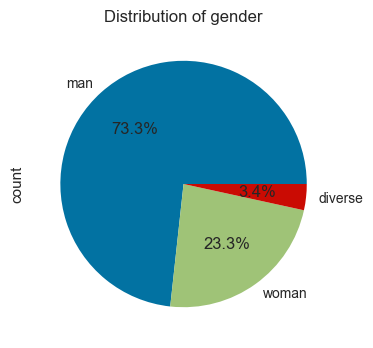

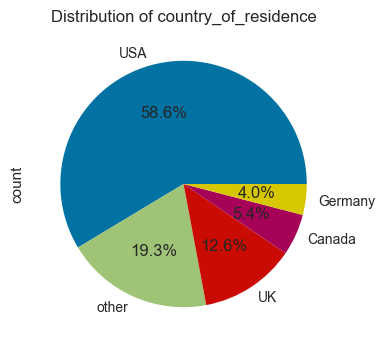

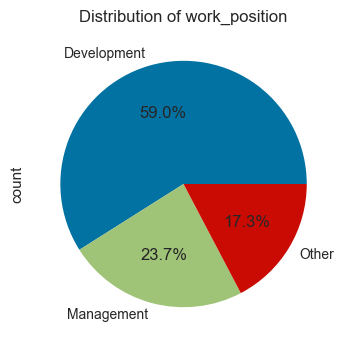

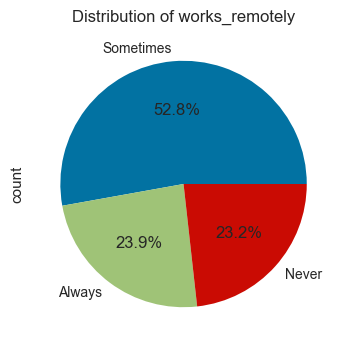

In [23]:
# Ploting Pie Charts for selected columns.
Columns = [
    'age',
    'gender',
    'country_of_residence', 
    'is_self_employed', 
    'work_position', 
    'works_remotely',
    ]

for col in data.columns:
    plt.figure(figsize=(8, 4))
    data[col].value_counts().plot(kind='pie', autopct='%1.1f%%')
    plt.title(f'Distribution of {col}')
    plt.show()

# Dimension reduction


In [25]:
# Encoding the values and scaling the data and reducing the dimensionality of the data using PCA.
label_encoder = LabelEncoder()
for col in data.select_dtypes(include='object').columns:
    data[col] = label_encoder.fit_transform(data[col])

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

pca = PCA(n_components=0.8)
data_pca = pca.fit_transform(data_scaled)

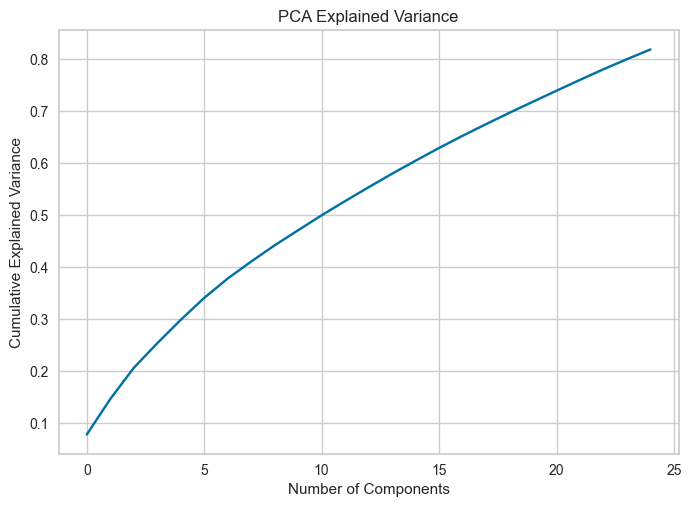

In [26]:
# Ploting the variance by number of components.
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.show()

# Cluster

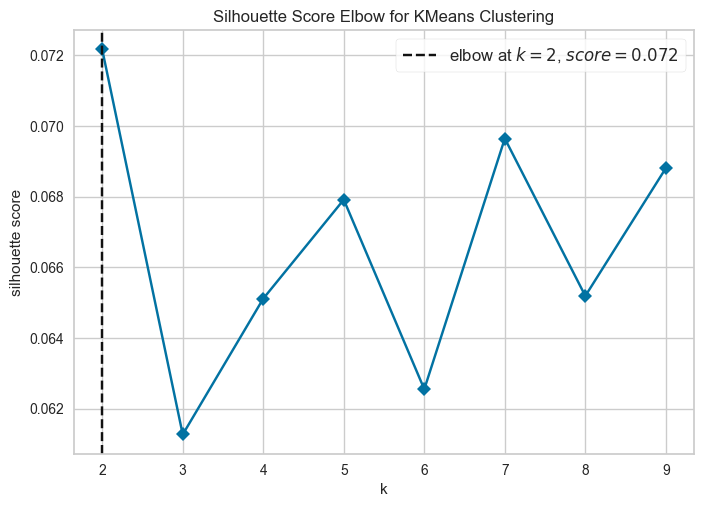

Optimal number of clusters:  2


In [27]:
# Finding the best value for kmeans clusters with the help of Elbow method and Silhouette analysis.
model = KMeans(init="k-means++", max_iter=200)

elbow_visualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette', timings=False)
elbow_visualizer.fit(data_pca)
elbow_visualizer.show()

print("Optimal number of clusters: ",elbow_visualizer.elbow_value_)

In [28]:
# Fiting KMeans based on optimal clusters.
optimal_clusters = elbow_visualizer.elbow_value_
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(data_pca)

In [29]:
# Visualising cluster quality metrics.
print("Inertia:", kmeans.inertia_)
print("Silhouette Score:", silhouette_score(data_pca, cluster_labels))
print("Calinski-Harabasz Score:", calinski_harabasz_score(data_pca, cluster_labels))
print("Davies-Bouldin Score:", davies_bouldin_score(data_pca, cluster_labels))

Inertia: 41894.53122585984
Silhouette Score: 0.06005795551479631
Calinski-Harabasz Score: 91.51112044587654
Davies-Bouldin Score: 3.8990377689896083


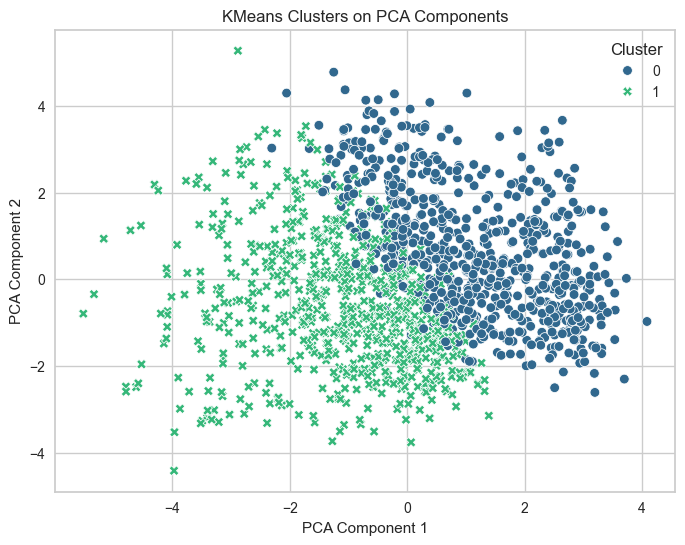

In [30]:
# Ploting clusters on PCA components
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=cluster_labels, palette='viridis', style=cluster_labels)
plt.title('KMeans Clusters on PCA Components')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

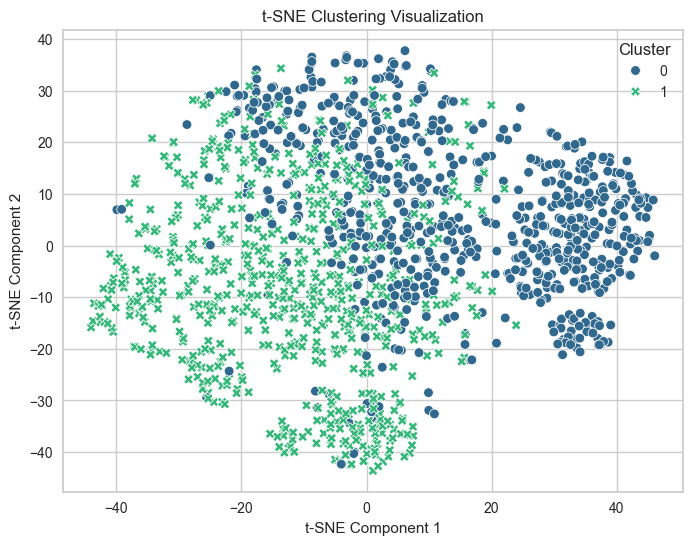

In [31]:
# Also ploting clusters on TSNE components.
tsne = TSNE(n_components=2, random_state=42)
data_tsne = tsne.fit_transform(data_pca)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=data_tsne[:, 0], y=data_tsne[:, 1], hue=cluster_labels, palette='viridis', style=cluster_labels)
plt.title('t-SNE Clustering Visualization')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Cluster')
plt.show()

In [32]:
# Describing each cluster in terms of key features.
data['Cluster'] = cluster_labels

for cluster in range(optimal_clusters):
    print(f"\nCluster {cluster} characteristics:")
    display(data[data['Cluster'] == cluster].describe(include='all'))


Cluster 0 characteristics:


is_self_employed  number_of_employees  is_tech_company  \
count        717.000000           717.000000       717.000000   
mean           0.400279             2.161785         0.952580   
std            0.490297             1.131835         0.212683   
min            0.000000             0.000000         0.000000   
25%            0.000000             2.000000         1.000000   
50%            0.000000             2.000000         1.000000   
75%            1.000000             2.000000         1.000000   
max            1.000000             5.000000         1.000000   

       provides_mental_health_benefits  aware_of_mental_health_options  \
count                       717.000000                      717.000000   
mean                          1.884240                        1.044630   
std                           0.441227                        0.625987   
min                           0.000000                        0.000000   
25%                           2.000000                        1.000000   
50%                           2.000000                        1.000000   
75%                           2.000000                        1.000000   
max                           2.000000                        2.000000   

       employer_discusses_mental_health  employer_resources_for_mental_health  \
count                         717.00000                            717.000000   
mean                            0.11576                              0.152022   
std                             0.32016                              0.359293   
min                             0.00000                              0.000000   
25%                             0.00000                              0.000000   
50%                             0.00000                              0.000000   
75%                             0.00000                              0.000000   
max                             1.00000                              1.000000   

       anonymity_protected_for_treatment  \
count                         717.000000   
mean                            0.991632   
std                             0.091158   
min                             0.000000   
25%                             1.000000   
50%                             1.000000   
75%                             1.000000   
max                             1.000000   

       request_medical_leave_due_to_mental_health  \
count                                  717.000000   
mean                                     2.238494   
std                                      1.071610   
min                                      0.000000   
25%                                      2.000000   
50%                                      2.000000   
75%                                      2.000000   
max                                      4.000000   

       fear_negative_consequences_discussing_mental_health  ...  \
count                                         717.000000    ...   
mean                                            0.396095    ...   
std                                             0.530507    ...   
min                                             0.000000    ...   
25%                                             0.000000    ...   
50%                                             0.000000    ...   
75%                                             1.000000    ...   
max                                             2.000000    ...   

       observed_unsupportive_response_to_mental_health_issues  \
count                                         717.000000        
mean                                            1.237099        
std                                             1.005358        
min                                             0.000000        
25%                                             1.000000        
50%                                             1.000000        
75%                                             2.000000        
max                      


Cluster 1 characteristics:


is_self_employed  number_of_employees  is_tech_company  \
count             716.0           716.000000       716.000000   
mean                0.0             3.094972         0.680168   
std                 0.0             1.637644         0.466737   
min                 0.0             0.000000         0.000000   
25%                 0.0             2.000000         0.000000   
50%                 0.0             3.000000         1.000000   
75%                 0.0             5.000000         1.000000   
max                 0.0             5.000000         1.000000   

       provides_mental_health_benefits  aware_of_mental_health_options  \
count                       716.000000                      716.000000   
mean                          1.405028                        0.892458   
std                           0.863026                        0.718116   
min                           0.000000                        0.000000   
25%                           0.000000                        0.000000   
50%                           2.000000                        1.000000   
75%                           2.000000                        1.000000   
max                           2.000000                        2.000000   

       employer_discusses_mental_health  employer_resources_for_mental_health  \
count                        716.000000                            716.000000   
mean                           0.205307                              0.259777   
std                            0.404208                              0.438818   
min                            0.000000                              0.000000   
25%                            0.000000                              0.000000   
50%                            0.000000                              0.000000   
75%                            0.000000                              1.000000   
max                            1.000000                              1.000000   

       anonymity_protected_for_treatment  \
count                         716.000000   
mean                            0.891061   
std                             0.311780   
min                             0.000000   
25%                             1.000000   
50%                             1.000000   
75%                             1.000000   
max                             1.000000   

       request_medical_leave_due_to_mental_health  \
count                                  716.000000   
mean                                     1.765363   
std                                      1.186510   
min                                      0.000000   
25%                                      1.000000   
50%                                      2.000000   
75%                                      2.000000   
max                                      4.000000   

       fear_negative_consequences_discussing_mental_health  ...  \
count                                         716.000000    ...   
mean                                            0.832402    ...   
std                                             0.846125    ...   
min                                             0.000000    ...   
25%                                             0.000000    ...   
50%                                             1.000000    ...   
75%                                             2.000000    ...   
max                                             2.000000    ...   

       observed_unsupportive_response_to_mental_health_issues  \
count                                         716.000000        
mean                                            1.250000        
std                                             1.031158        
min                                             0.000000        
25%                                             0.000000        
50%                                             1.000000        
75%                                             2.000000        
max                      